In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')

# 1. Basic Info
print("=== Dataset Overview ===")
print(f"Total passengers: {len(df)}")
print(f"Survival rate: {df['Survived'].mean():.1%}")
print("\nMissing values:")
print(df.isnull().sum())

# 2. Survival Analysis
print("\n=== Survival Analysis ===")
print(f"Overall survival: {df['Survived'].mean():.1%}")

# Survival by sex
sex_survival = df.groupby('Sex')['Survived'].agg(['count', 'mean'])
print("\nSurvival by gender:")
print(sex_survival)

# Survival by class
class_survival = df.groupby('Pclass')['Survived'].agg(['count', 'mean'])
print("\nSurvival by class:")
print(class_survival)

# Survival by age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 100], 
                        labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])
age_survival = df.groupby('AgeGroup')[sur'Survived'].mean()
print("\nSurvival by age group:")
print(age_survival)

# 3. Age Distribution
print("\n=== Age Distribution ===")
print(f"Mean age: {df['Age'].mean():.1f} years")
print(f"Median age: {df['Age'].median()} years")
print(f"Oldest passenger: {df['Age'].max()} years")
print(f"Youngest passenger: {df['Age'].min()} years")

# 4. Family Analysis
print("\n=== Family Analysis ===")
df['FamilySize'] = df['SibSp'] + df['Parch']
family_survival = df.groupby('FamilySize')['Survived'].mean()
print("\nSurvival by family size:")
print(family_survival)

# 5. Fare Analysis
print("\n=== Fare Analysis ===")
print(f"Average fare: £{df['Fare'].mean():.2f}")
print(f"Median fare: £{df['Fare'].median():.2f}")
print(f"Most expensive ticket: £{df['Fare'].max():.2f}")
print(f"Cheapest ticket: £{df['Fare'].min():.2f}")

# 6. Embarked Analysis
print("\n=== Embarked Analysis ===")
embarked_survival = df.groupby('Embarked')['Survived'].agg(['count', 'mean'])
print(embarked_survival)

# Visualizations
plt.figure(figsize=(15, 10))

# Survival by gender
plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')

# Survival by class
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')

# Age distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

# Survival by age group
plt.subplot(2, 2, 4)
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')

plt.tight_layout()
plt.show()

# Additional visualizations
plt.figure(figsize=(15, 5))

# Family size impact
plt.subplot(1, 2, 1)
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')

# Fare distribution by class
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df1=pd.read_csv("train.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df1.shape

(891, 12)

In [9]:
df1.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [11]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
print(f"Survival_rate: {df1['Survived'].mean():.1%}")

Survival_rate: 38.4%


In [33]:
survival_rate=df1['Survived'].mean()
survival_rate

0.3838383838383838

In [35]:
print(f"Overal_survial_rate: {df1['Survived'].mean():.1%}")

Overal_survial_rate: 38.4%


### Survival by sex:

In [42]:
sex_survial=df1.groupby('Sex')['Survived'].agg(['count','mean'])
print(sex_survial)


        count      mean
Sex                    
female    314  0.742038
male      577  0.188908


### Survival by class

In [50]:
class_survival=df1.groupby('Pclass')['Survived'].agg(['count','mean'])
class_survival

,count,mean
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


### Survival by age groups

In [61]:
df1['AgeGroup'] = pd.cut(df1['Age'], bins=[0,10,20,30,40,50,100],
                       labels=['0-10','10-20','20-30','30-40','40-50','50+'])
age_survival = df1.groupby('AgeGroup')['Survived'].mean()
print(age_survival)

AgeGroup
0-10     0.593750
10-20    0.382609
20-30    0.365217
30-40    0.445161
40-50    0.383721
50+      0.343750
Name: Survived, dtype: float64


C:\Users\mahesh sai\AppData\Local\Temp\ipykernel_20616\2194566285.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df1.groupby('AgeGroup')['Survived'].mean()


### 3. Age Distribution

In [69]:
print(f"Mean age: {df1['Age'].mean():.1f}years")
print(f"Medain age: {df1['Age'].median()}years")
print(f"Oldest passenger:{df1['Age'].max()}years")
print(f"Youngest passenger:{df1['Age'].min()}years")

Mean age: 29.7years
Medain age: 28.0years
Oldest passenger:80.0years
Youngest passenger:0.42years


### visualizatuions

In [77]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Survival by gender

Text(0.5, 1.0, 'Survival Rate by Gender')

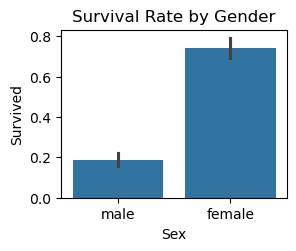

In [80]:
plt.subplot(2,2,1)
sns.barplot(x='Sex',y='Survived',data=df1)
plt.title("Survival Rate by Gender")

### Age Distribution

Text(0.5, 1.0, 'Age Distribution')

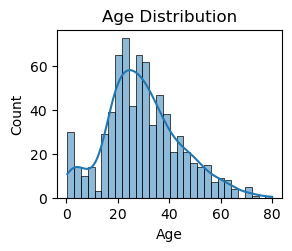

In [83]:
plt.subplot(2,2,3)
sns.histplot(df1['Age'].dropna(),bins=30,kde=True)
plt.title('Age Distribution')

### Survival by age group

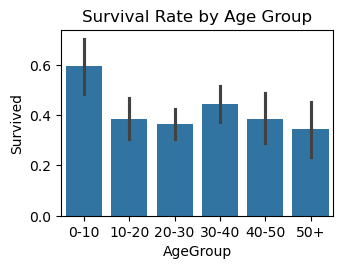

In [90]:
plt.subplot(2, 2, 4)
sns.barplot(x='AgeGroup', y='Survived', data=df1)
plt.title('Survival Rate by Age Group')
plt.tight_layout()
plt.show()

In [ ]:
# Additional visualizations
plt.figure(figsize=(15, 5))

# Family size impact
plt.subplot(1, 2, 1)
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')

### Additional visualizations

In [93]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Survival Rate by Family Size')

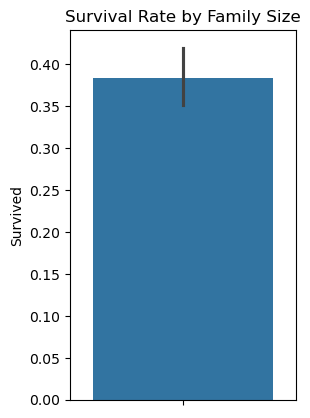

In [99]:
# Family size impact
plt.subplot(1, 2, 1)
sns.barplot(y='Survived', data=df1)
plt.title('Survival Rate by Family Size')

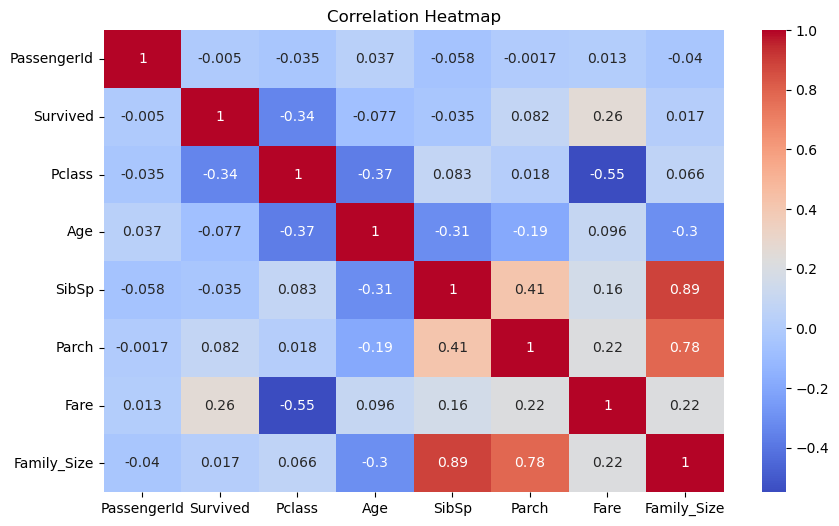

In [105]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_df = df1.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()